<a href="https://colab.research.google.com/github/amysen/dimensionality_reduction/blob/main/t_SNE_on_MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading MNIST Digits

MNIST dataset loading source: https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python

In [ ]:
from keras.datasets import mnist

Split the data by loading the training and testing sets into separate variables.

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Let’s find out how many images are there in the training and testing sets. In other words, let’s try and find out the split ratio of the this dataset by printing the shapes of all the vectors.

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


We can see that there are 60k images in the training set and 10k images in the testing set.

The dimension of our training vector is (60000, 28, 28), this is because there are 60,000 grayscale images with the dimension 28X28.

This is a bit much to sit around and wait for t-SNE to capture the relationships so lets reduce for this demo...

In [ ]:
train_X, train_y = train_X[:1000], train_y[:1000]
test_X, test_y = test_X[:100], test_y[:100]

And to see our range of labels from 0-9

In [ ]:
import numpy as np
print(np.unique(train_y))

[0 1 2 3 4 5 6 7 8 9]


# Visualising MNIST

It is always a good idea to plot the dataset you are working on. It will give you a good idea about the kind of data you are dealing with.

As a responsible data scientist, it should be your duty to always plot the dataset as step zero. Here we are plotting the first 10 digits from the training dataset.

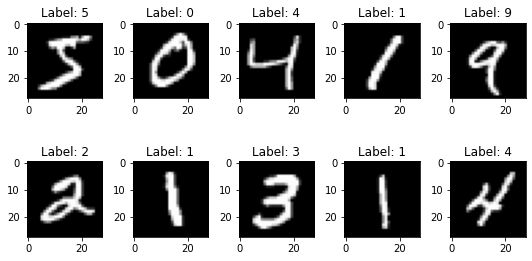

In [ ]:
from matplotlib import pyplot

num = 10
images = train_X[:num]
labels = train_y[:num]

num_row = 2
num_col = 5# plot images
fig, axes = pyplot.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
pyplot.tight_layout()
pyplot.show()

# PCA with sklearn.decomposition

In [ ]:
# Reshaping the dataset
train_X = train_X.reshape(1000, 784)

# Change integers to 32-bit floating point numbers
train_X = train_X.astype('float32')

In [ ]:
# Apply standarization to training data
from sklearn.preprocessing import StandardScaler
train_X = StandardScaler().fit_transform(train_X)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
pc = pca.fit_transform(train_X)
pc_df = pd.DataFrame(data = pc ,
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = train_y

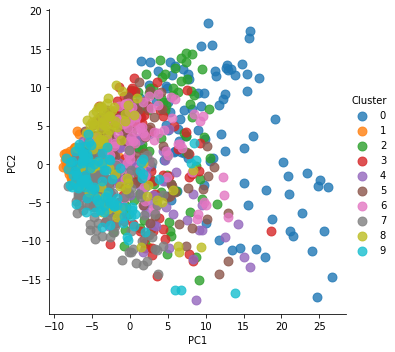

In [ ]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df,
  fit_reg=False,
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

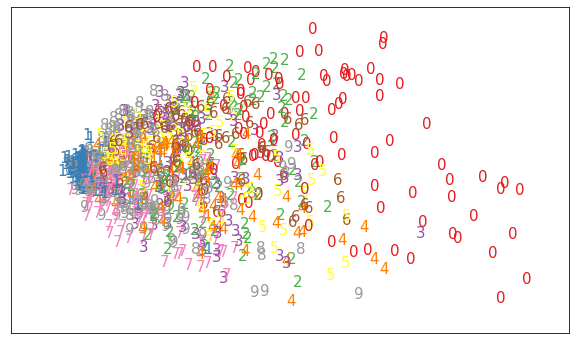

In [ ]:
import matplotlib.pyplot as plt
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i]),
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

plot_components(pc, train_y)

# t-SNE with sklearn.manifold

Want to drop the labels from the training and test data (else the model will jsut learn these...)

In [ ]:
train_X = train_X.reshape((len(train_X), np.prod(train_X.shape[1:])))
test_X = test_X.reshape((len(test_X), np.prod(test_X.shape[1:])))

TODO: Where the magic happens

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(train_X)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Lets see what we've got!

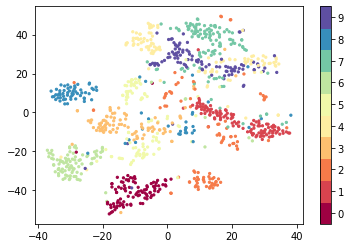

In [ ]:
pyplot.scatter(tsne_res[:, 0], tsne_res[:, 1], s= 5, c=train_y, cmap='Spectral')
pyplot.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

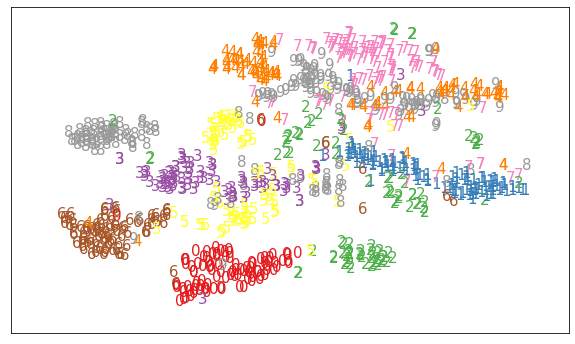

In [ ]:
import matplotlib.pyplot as plt
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i]),
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

plot_components(tsne_res, train_y)